In [87]:
from src.data import load_data
from src.models import util_model
from src.data import util

In [88]:
image_name = "trans015" 
front_image_name = image_name + "-1"
back_image_name = image_name + "-2"
front_image_path = "data/raw/front"
back_image_path = "data/raw/back"
front_image = load_data.read_image(front_image_path, front_image_name)
back_image = load_data.read_image(back_image_path, back_image_name)

In [89]:
front_section_dict = util_model.detect_section(front_image, util_model.front_model)
pf_sections = util.pre_process(front_section_dict)
front_text_dict = util_model.images_to_texts(pf_sections)
courses_df = util.make_course(front_text_dict)
error_df = util.get_error(courses_df)
error_df


0: 640x480 3 sections, 606.5ms
Speed: 3.1ms preprocess, 606.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
Error from get_courseID
กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ   1.0   4


,ocr,numeric,section,id,name,unit,grade
75,กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ 1.0...,15 4,217,999,การศึกษาค้นคว้าและสร้างองค์ความ,1.5,4.0


In [90]:
post_courses_df = util.post_process(courses_df, pf_sections)
post_error_df = util.get_error(post_courses_df).reset_index(drop=True)
post_error_df

['กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ   1.0   4' '15   4' '217' '999' 'การศึกษาค้นคว้าและสร้างองค์ความ' 1.5 4.0]
Error from get_courseID
กง พ๑9๕41บ1 พลานามย 2 เวยลเลยบยล/        บว   *
Error from get_courseID
กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ   1.0   4
Error from get_courseID
กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ   1.0   4
Error from get_courseID
กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ   1.0   4
Error from get_courseID
กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ   1.0   4
Error from get_courseID
กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ   1.0   4


,ocr,numeric,section,id,name,unit,grade
0,กณ 30201 การศึกษาค้นคว้าและสร้างองค์ความ 1.0...,15 4,217,999,การศึกษาค้นคว้าและสร้างองค์ความ,1.5,4.0


In [91]:
# util_model.get_ocr_text(pf_sections[2]).split('\n')

In [92]:
back_section_dict = util_model.detect_section(back_image, util_model.back_model)
pb_sections = util.pre_process(back_section_dict)
back_text_dict = util_model.images_to_texts(pb_sections)
gpa = util.get_GPA(back_text_dict[0])
gpa


0: 640x480 1 section, 595.8ms
Speed: 2.0ms preprocess, 595.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


,ocr,category,unit,grade
0,กก ภาษาไทย 6.0 4.00,ภาษาไทย,6.00,4.00
1,กข คณิตศาสตร์ 18.0 4.00,คณิตศาสตร์,18.00,4.00
2,กข วิทยาศาสตร์และเทคโนโลยี 43.0 3.87,วิทยาศาสตร์,43.00,3.87
3,กค 7สังคมศึกษา ศาสนา และวัฒนธรรม 8.0 4.00,สังคมศึกษา,8.00,4.00
4,กค ไสุขศึกษาและพลศึกษา 3.0 4.00,สุขศึกษา,3.00,4.00
5,กม ศิลปะ 3.0 4.00,ศิลปะ,3.00,4.00
6,กง ไการงานอาชีพ 1.0 3.75,การงานอาชีพ,1.00,3.75
7,กจ ภาษาต่างประเทศ 12.0 3.91,ภาษาต่างประเทศ,12.00,3.91
8,กฉ การศึกษาค้นคว้าด้วยตนเอง (!5) 2.0 4.00,ศึกษาค้นคว้าด้วยตนเอง,2.00,4.00
9,กช ผลการเรียนเฉลี่ยดลอดหลักสูตร 96.0 3.93,ผลการเรียน,0.96,3.93


In [93]:
front_edf = post_courses_df[["section", "id", "name", "unit", "grade"]]
back_edf = gpa[["category", "unit", "grade"]]

In [94]:
front_edf

,section,id,name,unit,grade
0,000,ท33101,ภาษาไทย,1.0,4.0
1,001,ค33103,คณิตศาสตร์,1.0,4.0
2,002,ส33101,สังคมศึกษาและวัฒนธรรม,1.0,4.0
3,003,พ33101,พลานามัย,0.5,4.0
4,004,ศ33101,ศิลปะ,0.5,4.0
...,...,...,...,...,...
89,231,ว32249,ชีววิทยา,1.5,4.0
90,232,ว32264,โลก ดาราศาสตร์และอวกาศ,1.0,4.0
91,233,ว32269,การออกแบบและเทคโนโลยีเพิ่มเติม,0.5,3.5
92,234,อ30219,ภาษาอังกฤษรอบรู้,1.0,4.0


In [95]:
back_edf

,category,unit,grade
0,ภาษาไทย,6.00,4.00
1,คณิตศาสตร์,18.00,4.00
2,วิทยาศาสตร์,43.00,3.87
3,สังคมศึกษา,8.00,4.00
4,สุขศึกษา,3.00,4.00
5,ศิลปะ,3.00,4.00
6,การงานอาชีพ,1.00,3.75
7,ภาษาต่างประเทศ,12.00,3.91
8,ศึกษาค้นคว้าด้วยตนเอง,2.00,4.00
9,ผลการเรียน,0.96,3.93


In [96]:
load_data.export_df_to_csv("data/out/csv/front", front_image_name, front_edf)
load_data.csv_to_json("data/out/json/front", "data/out/csv/front", front_image_name)
load_data.export_df_to_csv("data/out/csv/back", back_image_name, back_edf)
load_data.csv_to_json("data/out/json/back", "data/out/csv/back", back_image_name)

In [97]:
bb = util_model.get_lines_pos(pf_sections[0])

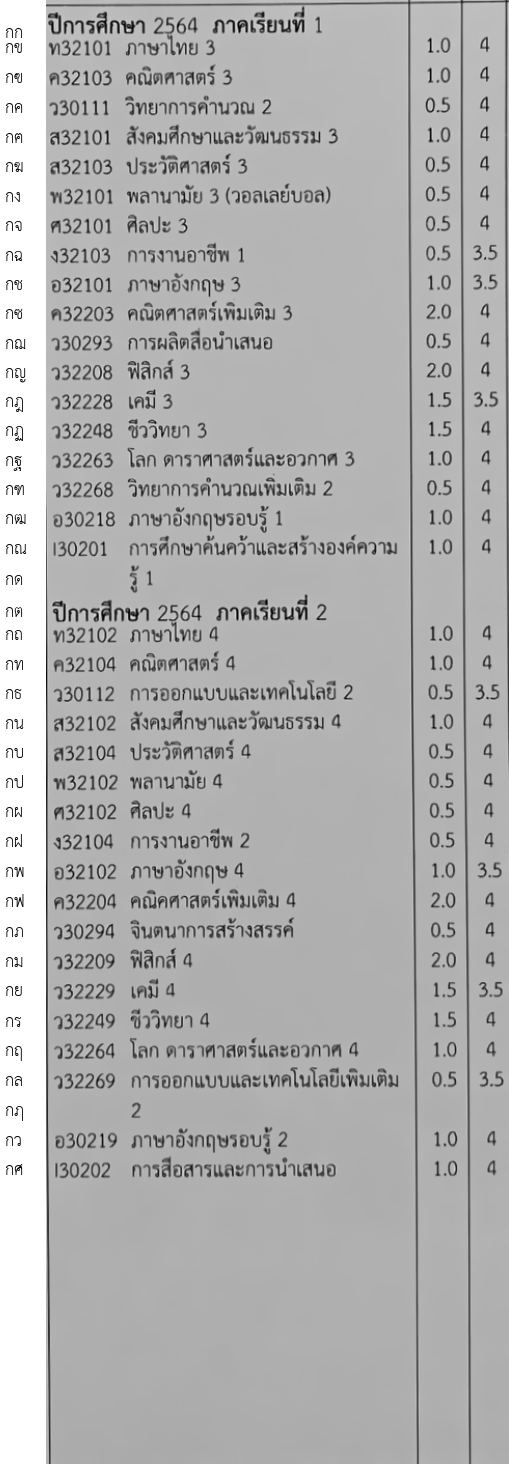

In [101]:
pf_sections[2]

In [ ]:
import pandas as pd

In [ ]:
d = pd.DataFrame({"A": [1, 2, 3, 4],
                  "B": [1, 2, 3, 4]
                  }
)

In [ ]:
(d.A - d.A.shift(1)).abs().fillna(0)

0    0.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64